# Aula 4 - Transformadas de Laplace e decomposição em frações parciais usando Python

Vamos usar a biblioteca ```sympy```, que permite a manipulação de matemática simbólica, isto é, usando símbolos ao invés de números.

In [1]:
from sympy import Symbol, laplace_transform, inverse_laplace_transform, exp, cos, sin, plot, init_printing, I
init_printing()
%matplotlib inline

Agora, criaremos variáveis para representar o tempo e a variável complexa ```s```

In [2]:
t = Symbol('t')
s = Symbol('s')

## Funções para facilitar o uso da transformada de Laplace

O ```sympy``` possui funções para a transformada direta e inversa de Laplace, mas seus nomes são muito longos. Para facilitar, vamos criar funções mais simples de chamar.

In [3]:
def L(f):
    """
    Transformada de Laplace de t para s
    """
    return laplace_transform(f,t,s,noconds=True)

def iL(F): 
    """
    Transformada inversa de Laplace de s para t
    """
    return inverse_laplace_transform(F,s,t)

Vamos testar:

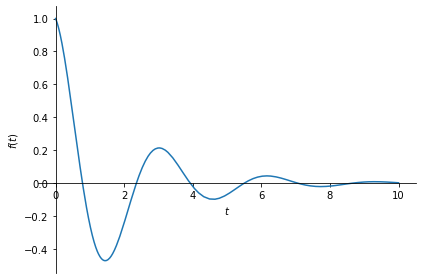

(s + 1/2)/((s + 1/2)**2 + 4)


In [4]:
f = exp(-t/2)*cos(2*t)
plot(f,(t,0,10),show=True)

F=L(f)

print(F)

Transformada inversa:

In [5]:
print(iL(F))

exp(-t/2)*cos(2*t)*Heaviside(t)


## Decomposição em frações parciais

Mesmo algoritmos de cálculo simbólico bons, como o ```sympy```, podem precisar de simplificações nas funções $F(s)$. A função que faz decomposição em frações parciais é ``apart``.

In [6]:
print(F.apart())

2*(2*s + 1)/(4*s**2 + 4*s + 17)


# Mais exemplos

3*(2*exp(t) - sin(2*t) - 2*cos(2*t))*exp(-t)*Heaviside(t)/10


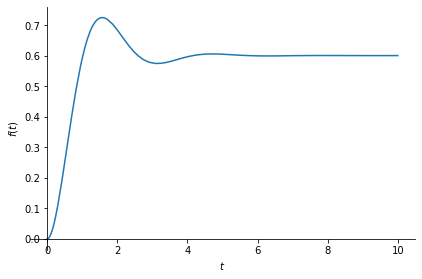

In [7]:
G = 3/(s*(s**2 + 2*s + 5))
g = iL(G)

print(iL(G))
plot(g,(t,0,10),show=True)

-(5*s + 42)/(36*(5*s**2 + 42*s + 180)) + 1/(36*s)
(51*exp(21*t/5) - 7*sqrt(51)*sin(3*sqrt(51)*t/5) - 51*cos(3*sqrt(51)*t/5))*exp(-21*t/5)*Heaviside(t)/1836


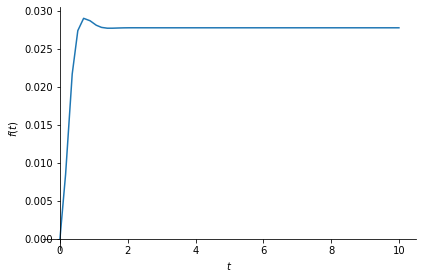

In [8]:
# Sistema de segunda ordem

om = 6
zeta = 0.7

D = 1/(s*(s**2 + 2*om*zeta*s + om**2))
D = D.apart(extension=[I])
print(D)
d = iL(D)

print(d)
plot(d,(t,0,10),show=True)

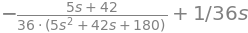

In [12]:
D

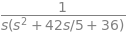

In [10]:
D.factor(extension=I)